In [ ]:
# Reduce 4D → 2D data using PCA for Iris dataset and train Logistic Regression to predict new flowers.

from sklearn.datasets import load_iris
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

iris = load_iris()
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.iloc[:,:-1]
y = df['target']

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

model = LogisticRegression()
model.fit(X_transformed,y)

new_flower_data = pd.DataFrame(data = [[2.3,5.4,3.4,5.6]], columns=iris.feature_names)
new_fl_trans = pca.transform(new_flower_data)

prediction = model.predict(new_fl_trans)

print(iris.target_names[prediction[0]])

versicolor


In [30]:
#Implement Multiple Linear Regression to predict house price.

from sklearn.linear_model import LinearRegression

house_data = pd.read_csv(r'C:/Users/Atharv/Downloads/dataset/msc/housearea.csv')
X = house_data.iloc[:,:-1]
y = house_data['price']

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict([[2600,3,4]])

print(y_pred[0])

555748.1751823648


In [ ]:
#Use crash.csv containing age, vehicle speed, survivor status. Build Logistic Regression to predict survivability.
from sklearn.linear_model import LogisticRegression

crash_data = pd.read_csv(r'C:/Users/Atharv/Downloads/dataset/msc/crash.csv')
X = crash_data.iloc[:,:-1]
y = crash_data['fate']

model = LogisticRegression()
model.fit(X,y)

y_pred = model.predict([[25,159]])
result = "Survived" if y_pred[0] == 1 else "Died"
print(result)

Died


In [48]:
# Fit Polynomial Regression to Salary_positions.csv, predict salaries of level 11 & 12 employees.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

salary = pd.read_csv(r'C:/Users/Atharv/Downloads/dataset/msc/position_sal.csv')

X = salary[['level']]
y = salary['salary']

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly,y)

Levels = pd.DataFrame({'level':[11,12]})
level_poly = poly.transform(Levels)

print(model.predict(level_poly))

[1780833.33333358 3035984.84848556]


In [51]:
# Classify Iris dataset using SVM. Compute accuracy for all kernels (linear, rbf, poly, sigmoid).

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.iloc[:,:-1]
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y)

kernels = ['poly','rbf','linear','sigmoid']

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test,y_pred))



0.9210526315789473
0.9473684210526315
0.9473684210526315
0.2631578947368421


In [ ]:
# Implement KNN prediction model using Iris or Salary dataset.
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.iloc[:,:-1]
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


y_pred = knn.predict(X_test)

# for i in y_pred:
#     print(iris.target_names[i])

In [64]:
# Implement a Naïve Bayes classifier for classification.
from sklearn.naive_bayes import GaussianNB
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.iloc[:,:-1]
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

model = GaussianNB()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# for i in y_pred:
#     print(iris.target_names[i])

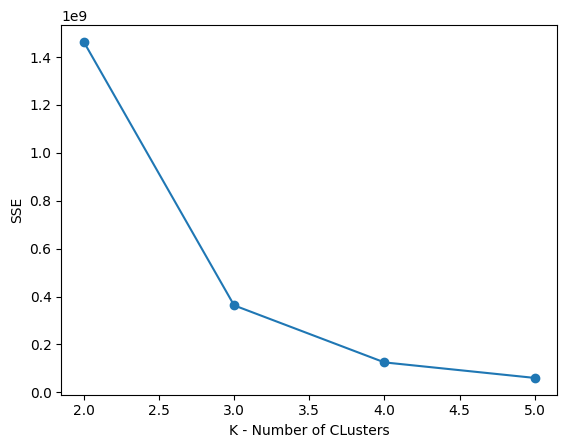

K2 Score =  0.8223993034695873
K3 Score =  0.37988970932495103
K4 Score =  0.3486035347451551
K5 Score =  0.31106642551839586
Optimal K =  2


In [84]:
#Implement K-means on employee income dataset. Preprocess missing values. Use Elbow method + Silhouette Score to find optimal K.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


df = pd.read_csv("C:/Users/Atharv/Downloads/dataset/msc/employee.csv")


df = df.dropna()   # drop missing values


data = df[["salary", "age"]]

sse = []
k_range = range(2,6)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker = "o")
plt.xlabel('K - Number of CLusters')
plt.ylabel('SSE')

plt.show()

sil_scores = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    predict = kmeans.fit_predict(data)
    sil = silhouette_score(data,predict)
    sil_scores[k] = sil

for k,v in sil_scores.items():
    print(f"K{k} Score =  {v}")


best_k = max(sil_scores, key=sil_scores.get)

print("Optimal K = ", best_k)

First few results:
           amount  cluster
209958   10567.02        1
394797  210790.23        0
150028  320257.99        0
257830  117592.39        1
327573  160810.62        0


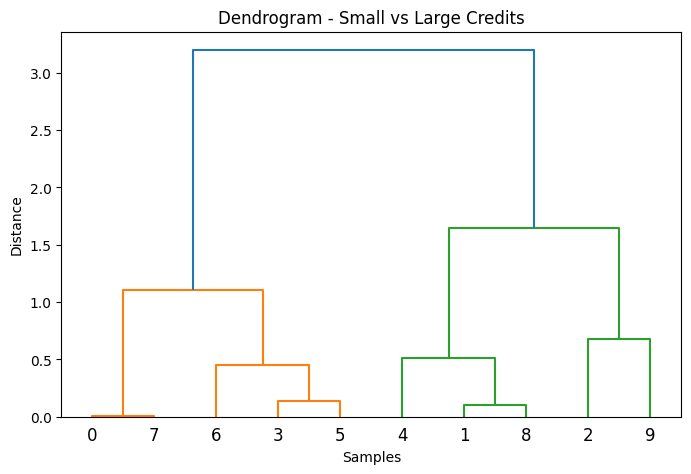

In [ ]:
#agglomerative

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Atharv/Downloads/dataset/msc/synthetic.csv")


df = df.sample(10, random_state=42)


df = df.dropna()


numeric_cols = ["amount"]
X = df[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model = AgglomerativeClustering(n_clusters=2,linkage='ward')
df['cluster'] = model.fit_predict(X_scaled)

print("First few results:")
print(df[["amount", "cluster"]].head())


Z = linkage(X_scaled, method='complete')

plt.figure(figsize=(8,5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Dendrogram - Small vs Large Credits")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


Accuracy: 0.9490909090909091

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       148
           1       0.95      0.94      0.94       127

    accuracy                           0.95       275
   macro avg       0.95      0.95      0.95       275
weighted avg       0.95      0.95      0.95       275



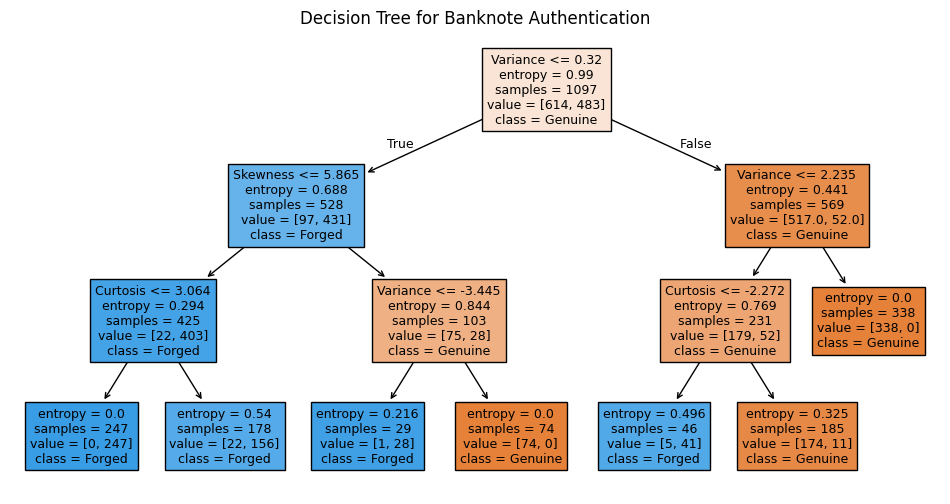

In [ ]:
# Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


df = pd.read_csv("C:/Users/Atharv/Downloads/dataset/msc/banknotes.csv")


X = df.iloc[:, 0:4]

y = df.iloc[:, 4]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth= 3)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Genuine","Forged"])
plt.title("Decision Tree for Banknote Authentication")
plt.show()
